In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
survivor_data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-01/summary.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  season_name = col_character(),
  season = col_double(),
  location = col_character(),
  country = col_character(),
  tribe_setup = col_character(),
  full_name = col_character(),
  winner = col_character(),
  runner_ups = col_character(),
  final_vote = col_character(),
  timeslot = col_character(),
  premiered = col_date(format = ""),
  ended = col_date(format = ""),
  filming_started = col_date(format = ""),
  filming_ended = col_date(format = ""),
  viewers_premier = col_double(),
  viewers_finale = col_double(),
  viewers_reunion = col_double(),
  viewers_mean = col_double(),
  rank = col_double()
)




In [3]:
castaway_data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-01/castaways.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  season_name = col_character(),
  season = col_double(),
  full_name = col_character(),
  castaway = col_character(),
  age = col_double(),
  city = col_character(),
  state = col_character(),
  personality_type = col_character(),
  day = col_double(),
  order = col_double(),
  result = col_character(),
  jury_status = col_character(),
  original_tribe = col_character(),
  swapped_tribe = col_character(),
  swapped_tribe2 = col_character(),
  merged_tribe = col_character(),
  total_votes_received = col_double(),
  immunity_idols_won = col_double()
)




In [4]:
castaway_winner = castaway_data %>% filter(result == 'Sole Survivor') %>%
            mutate(state_sorted = state %>% fct_infreq() %>% fct_rev())

# Final Project

## Figure 1. Winners of Survivor by State

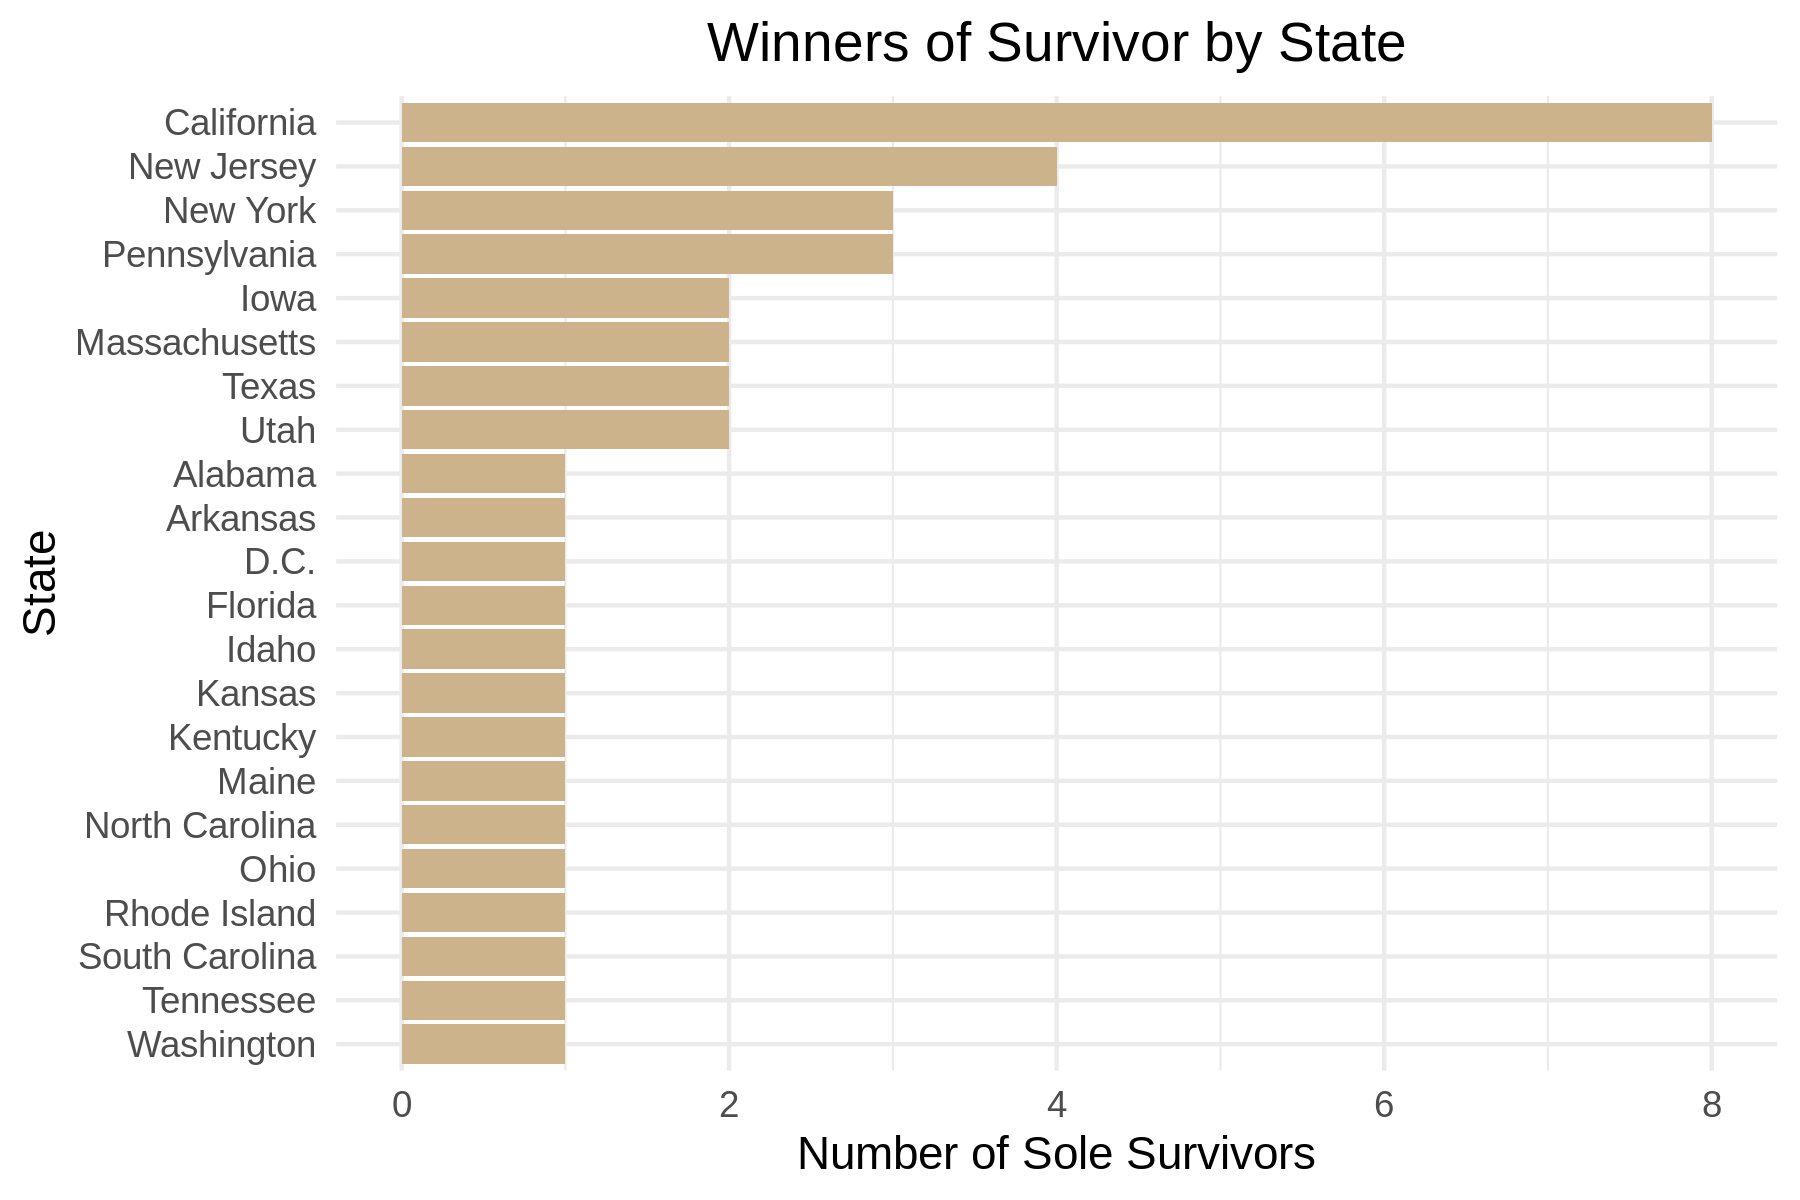

In [5]:
options(repr.plot.width=6, repr.plot.height=4)

p = ggplot(castaway_winner, aes(x = state_sorted))

p = p + geom_bar(fill = 'navajowhite3') + coord_flip() 

p = p + theme_minimal()

p = p + theme(plot.title = element_text(hjust = 0.5))

p = p + labs(x = "State", y = "Number of Sole Survivors", title = "Winners of Survivor by State")

p

## Figure 2. Finale Viewers by Season

`geom_smooth()` using formula 'y ~ x'



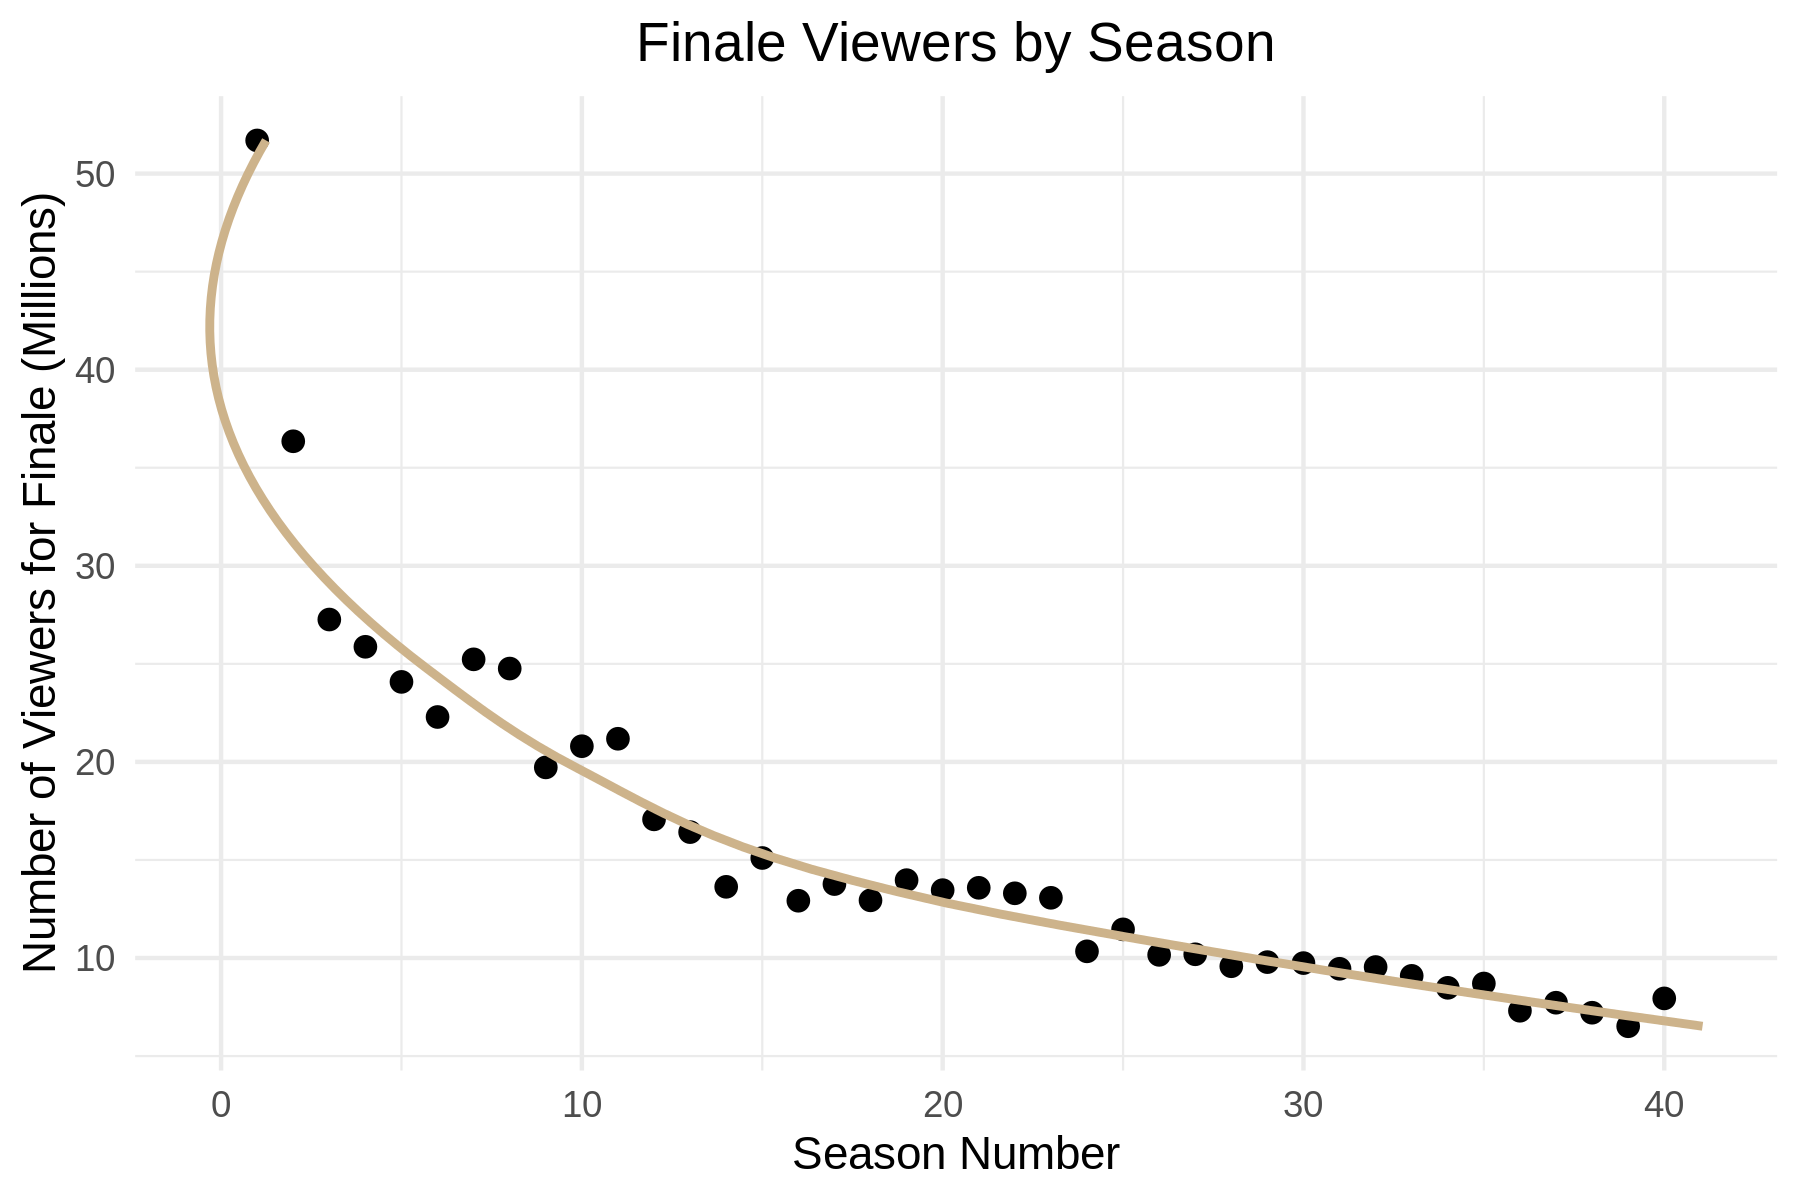

In [77]:
options(repr.plot.width=6, repr.plot.height=4)

p = ggplot(survivor_data, aes(x = viewers_finale, y = season))

p = p + geom_point(size = 2) + coord_flip() + geom_smooth(method = loess, se = FALSE, color = 'navajowhite3')

p = p + theme_minimal()

p = p + theme(plot.title = element_text(hjust = 0.5))

p = p + labs(x = "Number of Viewers for Finale (Millions)", y = "Season Number", title = "Finale Viewers by Season")

p

## Figure 3. Age of Contestants on Survivor

In [72]:
mean_age = castaway_data %>% pull(age) %>% mean() %>% print

[1] 33.40591


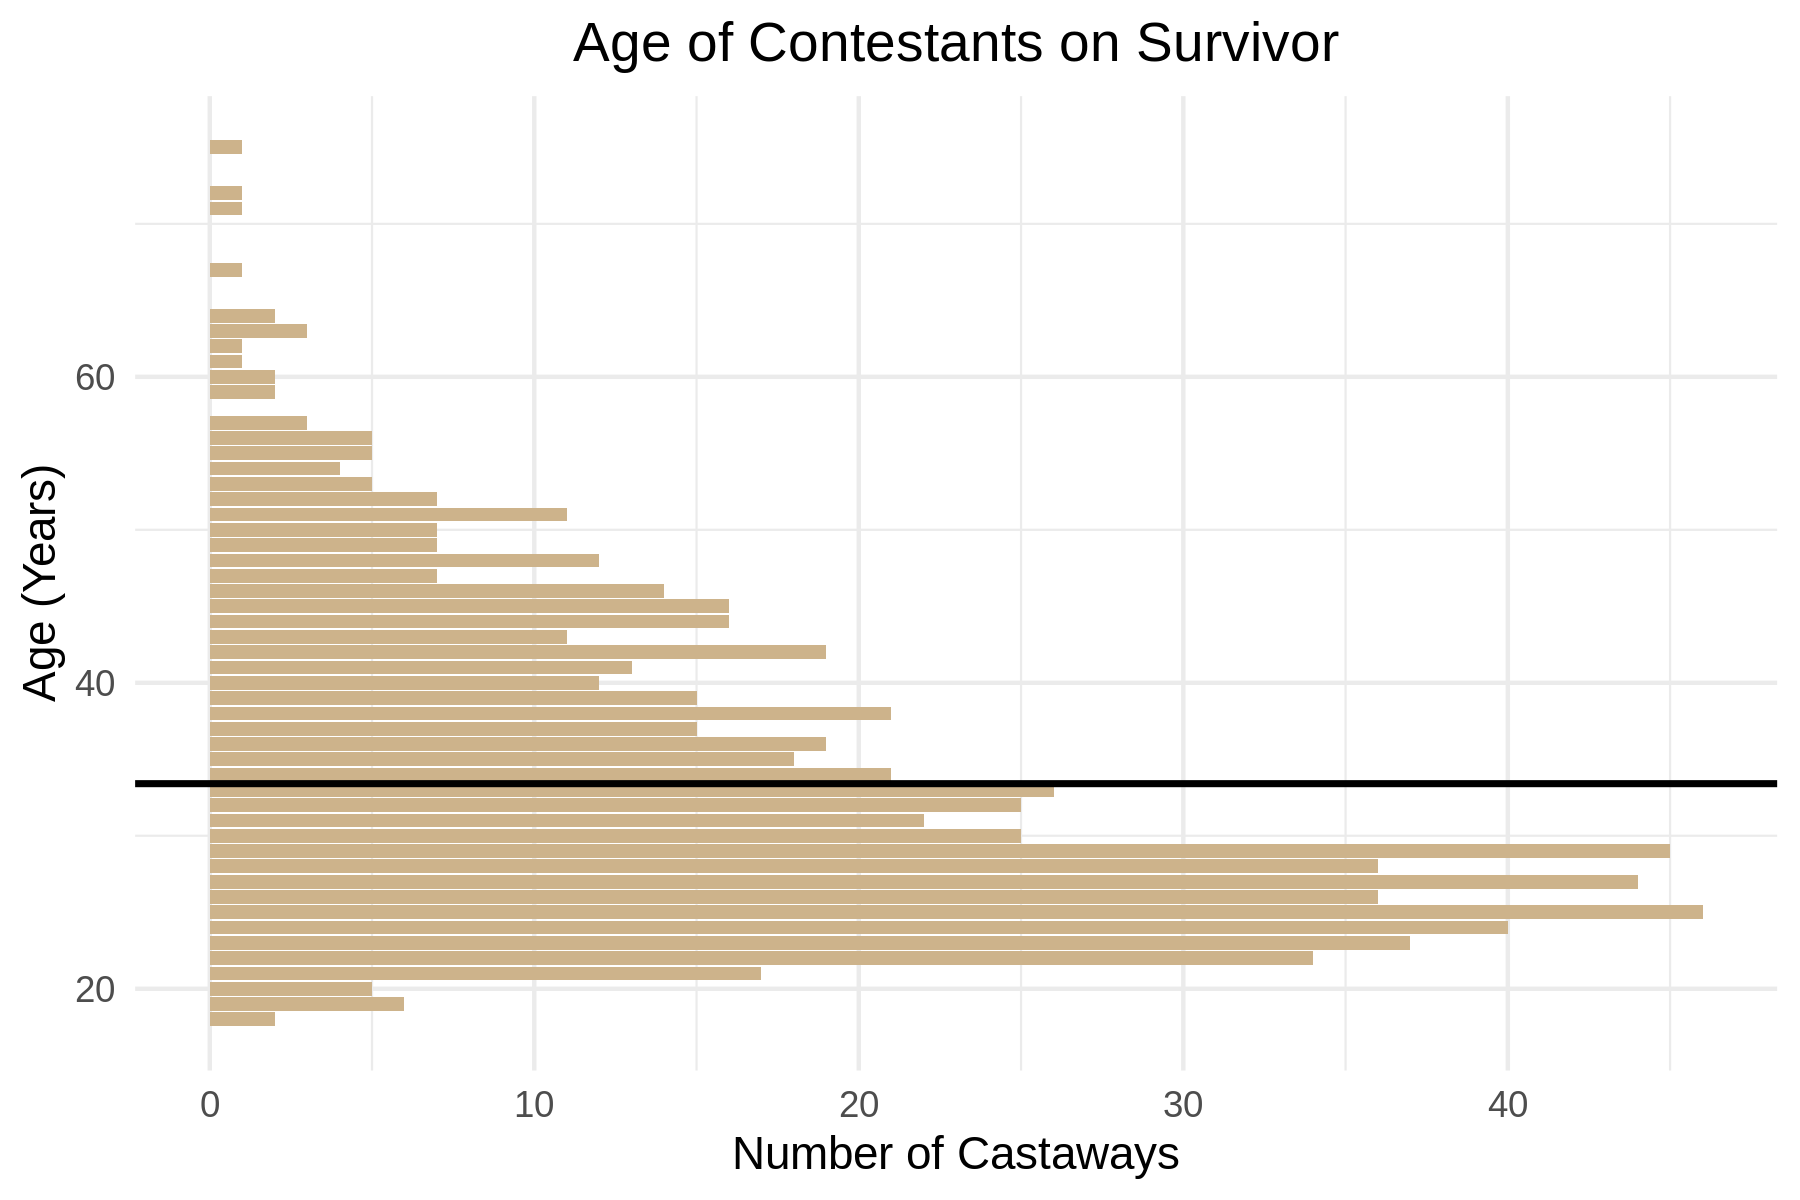

In [76]:
p = ggplot(castaway_data, aes(y = age))

p = p + geom_bar(fill = 'navajowhite3') + geom_hline(yintercept = mean(mean_age), size = 0.8, color="black")

p = p + theme_minimal()

p = p + theme(plot.title = element_text(hjust = 0.5))

p = p + labs(x = "Number of Castaways", y = "Age (Years)", title = "Age of Contestants on Survivor")


p

## Analysis

For my final project, I chose to use data on the TV show 'Survivor' from TidyTuesday. I chose this data because I am a fan of the show Survivor, and have considered applying for the show! In Figure 1, I wanted to show the number of winners of the show, aka the "Sole Surivor", from each state. California has had the most winners (8) over all of the seasons aired, followed by New Jersey with 4. To create this figure, I filtered the Sole Survivors from the Castaways dataset, and ordered the states by the highest frequency at the top of the visualization.

In Figure 2, I focused on the number of people in millions that have watched the finale each season. Interestingly and unfortunately, the number of viewers has decreased over the seasons. I added the tan line to makes it easier to see that decreasing trend. In Figure 3, I started by finding the average age of contestants of survivor, and found that it is about 33 years old. I was surprised by this finding because I assumed it would be around the mid-20s range. I then created a bar graph that shows the number of castaways by their ages, and included the black line which represents the average age of ~33 years old.